# Review

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from scipy.sparse import hstack, csr_matrix


# READ

In [3]:
# Load data from the .tsv file
df = pd.read_csv('restaurant_Reviews.tsv', delimiter='\t')


In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [33]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

# EDA

In [6]:
# Add a new column representing the length of each review
df['Review_Length'] = df['Review'].apply(len)

In [7]:

# Add a new column representing the word count of each review
df['Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

In [8]:
df['Uppercase_Count'] = df['Review'].apply(lambda x: sum(1 for char in x if char.isupper()))

In [9]:
df['Has_Not'] = df['Review'].apply(lambda x: 'not' in x.lower())

In [10]:
df.head()

,Review,Liked,Word_Count,Review_Length,Uppercase_Count,Has_Not
0,Wow... Loved this place.,1,4,24,2,False
1,Crust is not good.,0,4,18,1,True
2,Not tasty and the texture was just nasty.,0,8,41,1,True
3,Stopped by during the late May bank holiday of...,1,15,87,4,False
4,The selection on the menu was great and so wer...,1,12,59,1,False


C:\Users\idris\AppData\Local\Temp\ipykernel_17288\423166291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Liked', y='Review_Length', data=df, palette='pastel')


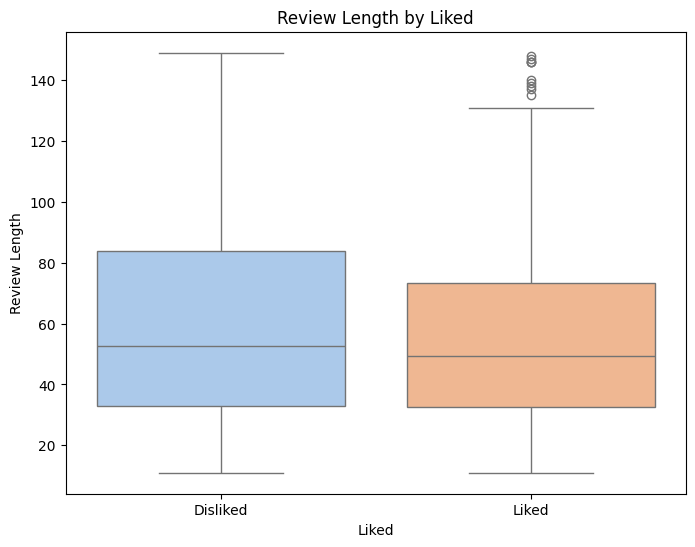

C:\Users\idris\AppData\Local\Temp\ipykernel_17288\423166291.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Liked', y='Word_Count', data=df, palette='pastel')


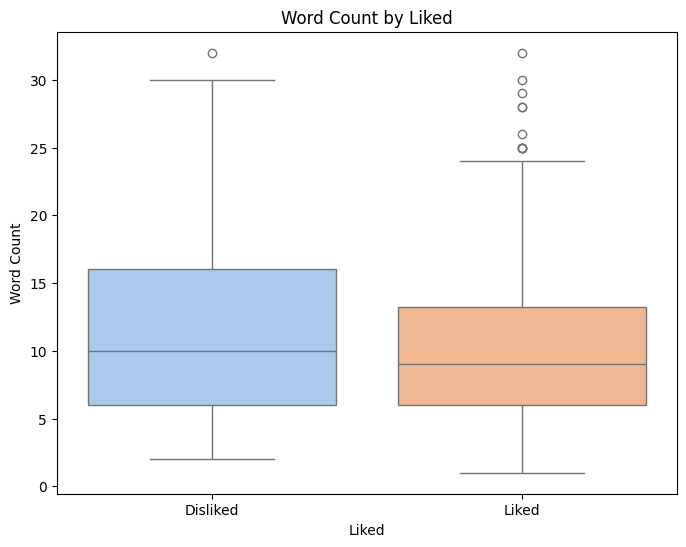

C:\Users\idris\AppData\Local\Temp\ipykernel_17288\423166291.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Liked', y='Uppercase_Count', data=df, palette='pastel')


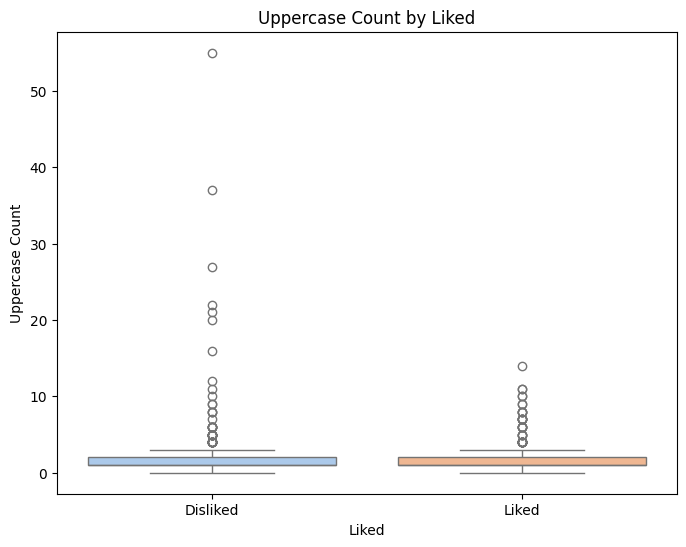

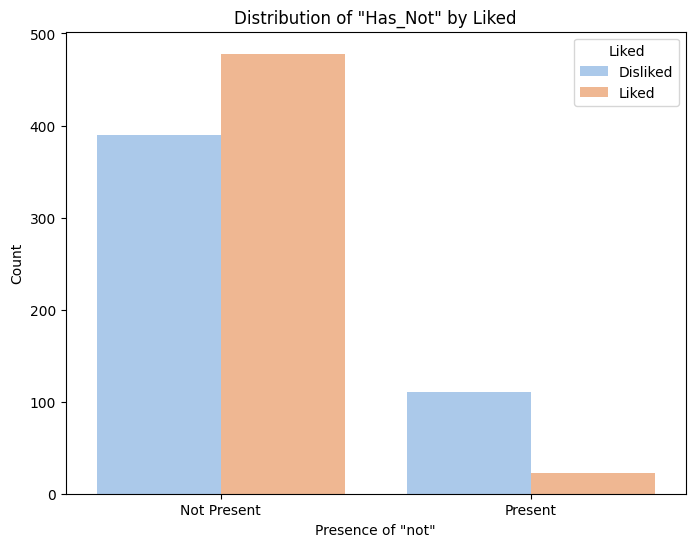

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Review Length
plt.figure(figsize=(8, 6))
sns.boxplot(x='Liked', y='Review_Length', data=df, palette='pastel')
plt.title('Review Length by Liked')
plt.xlabel('Liked')
plt.ylabel('Review Length')
plt.xticks([0, 1], ['Disliked', 'Liked'])
plt.show()

# Box plot for Word Count
plt.figure(figsize=(8, 6))
sns.boxplot(x='Liked', y='Word_Count', data=df, palette='pastel')
plt.title('Word Count by Liked')
plt.xlabel('Liked')
plt.ylabel('Word Count')
plt.xticks([0, 1], ['Disliked', 'Liked'])
plt.show()

# Box plot for Uppercase Count
plt.figure(figsize=(8, 6))
sns.boxplot(x='Liked', y='Uppercase_Count', data=df, palette='pastel')
plt.title('Uppercase Count by Liked')
plt.xlabel('Liked')
plt.ylabel('Uppercase Count')
plt.xticks([0, 1], ['Disliked', 'Liked'])
plt.show()

# Count plot for Has_Not
plt.figure(figsize=(8, 6))
sns.countplot(x='Has_Not', hue='Liked', data=df, palette='pastel')
plt.title('Distribution of "Has_Not" by Liked')
plt.xlabel('Presence of "not"')
plt.ylabel('Count')
plt.legend(title='Liked', loc='upper right', labels=['Disliked', 'Liked'])
plt.xticks([0, 1], ['Not Present', 'Present'])
plt.show()



# Modeling

In [17]:
# Define vectorizers
vectorizers = {
    'vectorizer_BOW': CountVectorizer(),
    'vectorizer_TF_IDF': TfidfVectorizer(),
    'vectorizer_BOW_bigram': CountVectorizer(ngram_range=(1, 2)),
    'vectorizer_TF_IDF_bigram': TfidfVectorizer(ngram_range=(1, 2))
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, n_jobs=-1),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}


## No feature

In [18]:

# Iterate over each model and vectorizer
for model_name, model in models.items():
    for vectorizer_name, vectorizer in vectorizers.items():
        print(f'========================= Model: {model_name}; Vectorizer: {vectorizer_name} =========================')
        X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Liked'], test_size=0.2, random_state=42)
        
        # Vectorize the data
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        
        # Train the model
        model.fit(X_train_vec, y_train)
        
        # Predictions
        predictions = model.predict(X_test_vec)
        
        # Classification report
        report = classification_report(y_test, predictions)
        print(report)

========================= Model: Logistic Regression; Vectorizer: vectorizer_BOW =========================
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        96
           1       0.87      0.75      0.80       104

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

========================= Model: Logistic Regression; Vectorizer: vectorizer_TF_IDF =========================
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        96
           1       0.85      0.74      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200

========================= Model: Logistic Regression; Vectorizer: vectorizer_BOW_bigram =========================
              p

## Features

In [20]:
# Define features
feature_sets = [
    ['Word_Count', 'Review_Length'],  # Only numerical features
    ['Word_Count', 'Review_Length', 'Uppercase_Count'],  # Numerical features and uppercase count
    ['Word_Count', 'Review_Length', 'Has_Not']  # Numerical features and 'Has_Not' column
]

In [21]:
# Iterate over each feature set and model
for features in feature_sets:
    print(f'========================= Features: {features} =========================')
    X = df[features]
    y = df['Liked']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Iterate over each model
    for model_name, model in models.items():
        print(f'========================= Model: {model_name} =========================')
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions
        predictions = model.predict(X_test)
        
        # Classification report
        report = classification_report(y_test, predictions)
        print(report)

========================= Features: ['Word_Count', 'Review_Length'] =========================
========================= Model: Logistic Regression =========================


              precision    recall  f1-score   support

           0       0.53      0.49      0.51        96
           1       0.56      0.61      0.58       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

========================= Model: SVM =========================
              precision    recall  f1-score   support

           0       0.48      0.30      0.37        96
           1       0.52      0.69      0.59       104

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.50      0.51      0.49       200

========================= Model: Random Forest =========================
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        96
           1       0.49      0.49      0.49       104

    accuracy                           0.47   

## both

In [28]:
# Iterate over each model and vectorizer
for model_name, model in models.items():
    for vectorizer_name, vectorizer in vectorizers.items():
        print(f'========================= Model: {model_name}; Vectorizer: {vectorizer_name} =========================')
        X_text = vectorizer.fit_transform(df['Review'])
        X_text = csr_matrix(X_text.astype('float64'))  # Convert X_text to CSR matrix with dtype float64
        X_features = df[['Word_Count']].values
        X_combined = hstack([X_text, X_features])
        y = df['Liked']
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predictions
        predictions = model.predict(X_test)
        
        # Classification report
        report = classification_report(y_test, predictions)
        print(report)

========================= Model: Logistic Regression; Vectorizer: vectorizer_BOW =========================


              precision    recall  f1-score   support

           0       0.76      0.86      0.81        96
           1       0.86      0.75      0.80       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200

========================= Model: Logistic Regression; Vectorizer: vectorizer_TF_IDF =========================
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        96
           1       0.82      0.70      0.76       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200

========================= Model: Logistic Regression; Vectorizer: vectorizer_BOW_bigram =========================
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        96
           1 

# use two vectorize

In [29]:
# Define vectorizers for word and character level
word_vectorizer = CountVectorizer(analyzer='word')
char_vectorizer = CountVectorizer(analyzer='char')

# Vectorize text reviews
X_word = word_vectorizer.fit_transform(df['Review'])
X_char = char_vectorizer.fit_transform(df['Review'])

# Combine the two vectorized representations
X_combined = hstack([X_word, X_char])

# Split data into train and test sets
y = df['Liked']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, n_jobs=-1),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f'========================= Model: {model_name} =========================')
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    predictions = model.predict(X_test)
    # Classification report
    report = classification_report(y_test, predictions)
    print(report)

========================= Model: Logistic Regression =========================
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        96
           1       0.83      0.69      0.75       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200

========================= Model: SVM =========================
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        96
           1       0.65      0.69      0.67       104

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200

========================= Model: Random Forest =========================
              precision    recall  f1-score   support

           0       0.68      0.78      0.72        96
           1       0.7

In [30]:

# Define vectorizers for word and character level
word_vectorizer_1_2 = CountVectorizer(analyzer='word', ngram_range=(1, 2))
word_vectorizer_1_5 = CountVectorizer(analyzer='word', ngram_range=(1, 5))
char_vectorizer_1_2 = CountVectorizer(analyzer='char', ngram_range=(1, 2))
char_vectorizer_1_5 = CountVectorizer(analyzer='char', ngram_range=(1, 5))

# Vectorize text reviews
X_word_1_2 = word_vectorizer_1_2.fit_transform(df['Review'])
X_word_1_5 = word_vectorizer_1_5.fit_transform(df['Review'])
X_char_1_2 = char_vectorizer_1_2.fit_transform(df['Review'])
X_char_1_5 = char_vectorizer_1_5.fit_transform(df['Review'])

# Combine the vectorized representations
X_combined = hstack([X_word_1_2, X_word_1_5, X_char_1_2, X_char_1_5])

# Split data into train and test sets
y = df['Liked']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, n_jobs=-1),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f'========================= Model: {model_name} =========================')
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    predictions = model.predict(X_test)
    # Classification report
    report = classification_report(y_test, predictions)
    print(report)

========================= Model: Logistic Regression =========================
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        96
           1       0.88      0.83      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

========================= Model: SVM =========================
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        96
           1       0.74      0.72      0.73       104

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200

========================= Model: Random Forest =========================
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        96
           1       0.8

In [32]:

# Define vectorizers for word and character level
word_vectorizer_1_2 = CountVectorizer(analyzer='word', ngram_range=(1, 2))
word_vectorizer_1_5 = CountVectorizer(analyzer='word', ngram_range=(2, 5))
char_vectorizer_1_2 = CountVectorizer(analyzer='char', ngram_range=(1, 2))
char_vectorizer_1_5 = CountVectorizer(analyzer='char', ngram_range=(2, 5))
slot_vectorizer = CountVectorizer()

# Vectorize text reviews
X_word_1_2 = word_vectorizer_1_2.fit_transform(df['Review'])
X_word_1_5 = word_vectorizer_1_5.fit_transform(df['Review'])
X_char_1_2 = char_vectorizer_1_2.fit_transform(df['Review'])
X_char_1_5 = char_vectorizer_1_5.fit_transform(df['Review'])

# Combine the vectorized representations
X_combined = hstack([X_word_1_2, X_word_1_5, X_char_1_2, X_char_1_5])

# Split data into train and test sets
y = df['Liked']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, n_jobs=-1),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f'========================= Model: {model_name} =========================')
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    predictions = model.predict(X_test)
    # Classification report
    report = classification_report(y_test, predictions)
    print(report)

========================= Model: Logistic Regression =========================
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        96
           1       0.87      0.83      0.85       104

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

========================= Model: SVM =========================
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        96
           1       0.74      0.70      0.72       104

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.72       200

========================= Model: Random Forest =========================
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        96
           1       0.8

In [37]:

# Define vectorizers for word and character level
word_vectorizer_1_5 = CountVectorizer(analyzer='word', ngram_range=(1, 5))
char_vectorizer_1_5 = CountVectorizer(analyzer='char', ngram_range=(2, 5))

# Vectorize text reviews
X_word_1_5 = word_vectorizer_1_5.fit_transform(df['Review'])
X_char_1_5 = char_vectorizer_1_5.fit_transform(df['Review'])

# Combine the vectorized representations
X_combined = hstack([X_word_1_5, X_char_1_5])

# Split data into train and test sets
y = df['Liked']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, n_jobs=-1),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    "maxent": LogisticRegression(max_iter=2000, n_jobs=-1, solver='lbfgs', penalty='l2')

}

# Train and evaluate each model
for model_name, model in models.items():
    print(f'========================= Model: {model_name} =========================')
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    predictions = model.predict(X_test)
    # Classification report
    report = classification_report(y_test, predictions)
    print(report)

========================= Model: Logistic Regression =========================
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        96
           1       0.86      0.80      0.83       104

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

========================= Model: SVM =========================
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        96
           1       0.77      0.72      0.75       104

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200

========================= Model: Random Forest =========================
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        96
           1       0.7